In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [10]:
from sklearn.metrics import accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Convolution2D(32, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='exponential'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0

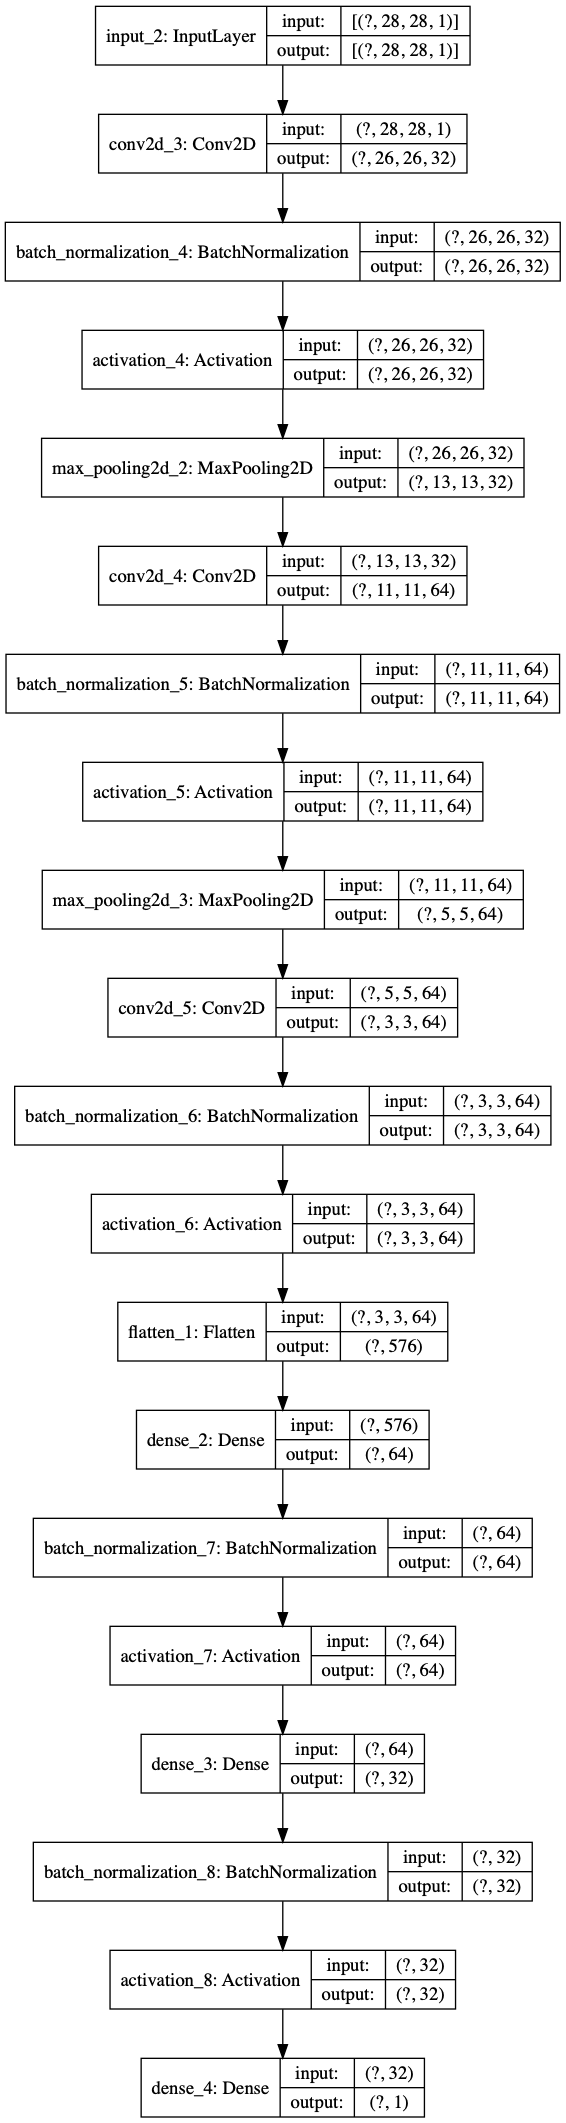

In [13]:
plot_model(model, show_shapes=True)

### Poisson Loss

In [16]:
model.compile(optimizer='adam', loss='poisson', metrics=['mean_squared_error'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 73s 1ms/sample - loss: -3.1289 - mean_squared_error: 1.5295 - val_loss: -3.2760 - val_mean_squared_error: 0.4430
Epoch 2/5
60000/60000 [==============================] - 76s 1ms/sample - loss: -3.2628 - mean_squared_error: 0.6365 - val_loss: -3.2892 - val_mean_squared_error: 0.3685
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/sample - loss: -3.2903 - mean_squared_error: 0.4452 - val_loss: -3.3042 - val_mean_squared_error: 0.2960
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/sample - loss: -3.3000 - mean_squared_error: 0.3651 - val_loss: -3.3137 - val_mean_squared_error: 0.1929
Epoch 5/5
60000/60000 [==============================] - 77s 1ms/sample - loss: -3.3145 - mean_squared_error: 0.2820 - val_loss: -3.3079 - val_mean_squared_error: 0.2382


In [20]:
X_test_updated = tf.cast(X_test, tf.float16)

In [22]:
y_pred = model.predict(X_test_updated)

In [26]:
y_pred = tf.round(y_pred)

In [30]:
accuracy_score(y_test, y_pred)

0.8505

### MSE

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 1.7432 - mean_squared_error: 1.7432 - val_loss: 0.5521 - val_mean_squared_error: 0.5521
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.5275 - mean_squared_error: 0.5275 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.3847 - mean_squared_error: 0.3847 - val_loss: 0.2816 - val_mean_squared_error: 0.2816
Epoch 4/5
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.3125 - mean_squared_error: 0.3125 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 5/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.2658 - mean_squared_error: 0.2658 - val_loss: 0.1748 - val_mean_squared_error: 0.1748


In [11]:
X_test_updated = tf.cast(X_test, tf.float16)

In [12]:
y_pred = model.predict(X_test_updated)

In [13]:
y_pred = tf.round(y_pred)

In [14]:
accuracy_score(y_test, y_pred)

0.948